In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [2]:
import sympy
print(sympy.__version__)

0.7.6.1


In [3]:
Re, Rm, omega0, B0, pi, Q, beta, c1, c2, rho, nu, eta, u0, du0 = symbols("R_e R_m Omega_0 B_0 pi Q beta c_1 c_2 rho nu eta u0 du0", real=True)
psi, u, A, B = symbols("psi u A B")
dt, dr, dz = symbols("d_t d_r d_z")
kr, kz = symbols("k_r k_z") 
r, z, t  = symbols("r, z, t")
sigma = symbols("sigma")

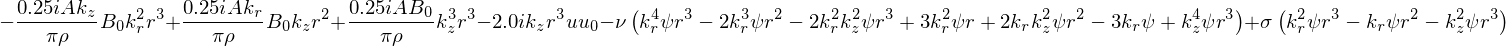

In [4]:
sigma*(-r**3*kz**2*psi + r**3*kr**2*psi - r**2*kr*psi) - r**2*2*r*u0*1j*kz*u + r**3*(1/(4*pi*rho))*B0*1j*kz**3*A + (1.0/(4*pi*rho))*B0*r**2*1j*kz*kr*A - (1.0/(4*pi*rho))*r**3*B0*1j*kz*kr**2*A - nu*(2*r**2*kz**2*kr*psi - 2*r**3*kz**2*kr**2*psi + r**3*kz**4*psi + r**3*kr**4*psi - 3*kr*psi + 3*r*kr**2*psi - 2*r**2*kr**3*psi)

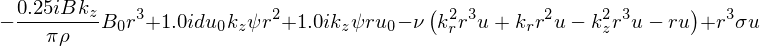

In [5]:
sigma*r**3*u + 1j*kz*r*u0*psi + 1j*kz*r*r*du0*psi - 1j*kz*r**3*(1/(4*pi*rho))*B0*B - nu*(-r**3*kz**2*u + r**3*kr**2*u + r**2*kr*u - r*u)

In [6]:
sigma*r*A - r*B0*1j*kz*psi - eta*(r*kr**2*A - r*kz**2*A - kr*A)

In [7]:
sigma*r**3*B + r*u0*1j*kz*A - r**3*B0*1j*kz*u - 1j*kz*r*r*du0*A - eta*(-r**3*kz**2*B + r**3*kr**2*B + r**2*kr*B - r*B)

In [8]:
LM = Matrix([[sigma*(-r**3*kz**2 + r**3*kr**2 - r**2*kr) - nu*(2*r**2*kz**2*kr - 2*r**3*kz**2*kr**2 + r**3*kz**4 + r**3*kr**4 - 3*kr + 3*r*kr**2 - 2*r**2*kr**3), -r**2*2*r*u0*1j*kz, r**3*(1/(4*pi*rho))*B0*1j*kz**3 + (1.0/(4*pi*rho))*B0*r**2*1j*kz*kr - (1.0/(4*pi*rho))*r**3*B0*1j*kz*kr**2, 0],
             [1j*kz*r*u0 + 1j*kz*r*r*du0, sigma*r**3 - nu*(-r**3*kz**2 + r**3*kr**2 + r**2*kr - r), 0, - 1j*kz*r**3*(1/(4*pi*rho))*B0],
             [-r*B0*1j*kz, 0, sigma*r - eta*(r*kr**2 - r*kz**2 - kr), 0],
             [0, -r**3*B0*1j*kz, r*u0*1j*kz - 1j*kz*r*r*du0, sigma*r**3 - eta*(-r**3*kz**2 + r**3*kr**2 + r**2*kr - r)]])

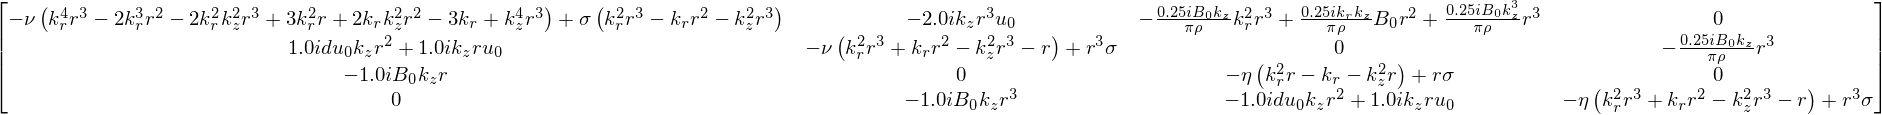

In [9]:
LM

$u_0 = c1 r + B/r$

$\partial_r u_0 = c1 - c2/r^2$

In [10]:
LM = LM.subs(u0, (r*c1 + c2/r))
LM = LM.subs(du0, (c1 - c2/r**2))

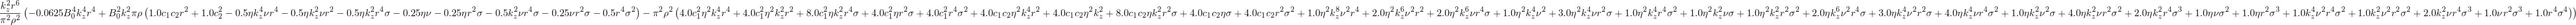

In [11]:
((LM.subs(kr, 0)).det()).simplify()

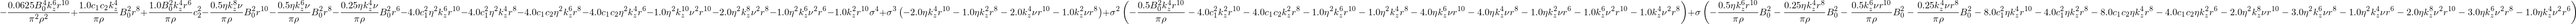

In [12]:
collect((LM.subs(kr, 0)).det(), sigma)

In [13]:
disp = LM.det()

In [19]:
func = lambdify((kr, nu, eta, r, rho, pi, B0, c1, c2), disp)

nu = 3.26e-3 $cm^2/s$

eta = 2000 $cm^2/s$

rho = 6 $g/cm^3$

B0 = 3000 G

In [98]:
r_in = 5. # cm
r_out = 3*r_in
h = 10. # cm
d = r_out - r_in
eps = h/d
K = np.pi/h * np.sqrt(1+eps**2)
Omega_in = 314 # rad/s
Omega_out = 37.9 # rad/s
nugj = 3.26e-3 # cm^2/s
Re_in = Omega_in/(nugj*K**2)
Re_out = Omega_out/(nugj*K**2)

c2gj = (Omega_out - Omega_in)/(1/r_out**2 - 1/r_in**2)
c1gj = Omega_in - c2gj/r_in**2

goodmanjiparams = func(0, 3.26E-3, 2000, 10.0, 6, np.pi, 3000, c1gj, c2gj)

In [99]:
goodmanjibykz = lambdify(kz, goodmanjiparams)

In [100]:
print(goodmanjiparams)
print(goodmanjibykz(0.314))

-425104000000.0*k_z**10 - 260800425104000.0*k_z**8*sigma - 1.55653619364674e+16*k_z**8 - 4.00002608001063e+16*k_z**6*sigma**2 - 4.77465998743995e+18*k_z**6*sigma - 1.86407088900614e+20*k_z**6 - 40000065200000.0*k_z**4*sigma**3 - 2.78732675437949e+15*k_z**4*sigma**2 - 6.7797312167189e+16*k_z**4*sigma + 2.96078966350234e+19*k_z**4 - 10000000000.0*k_z**2*sigma**4 - 200000326000.0*k_z**2*sigma**3 - 10981011207500.0*k_z**2*sigma**2 - 219620093749999.0*k_z**2*sigma
-985960000.0*sigma**4 - 408566714602.659*sigma**3 - 66517758252496.8*sigma**2 - 5.25710924859983e+15*sigma + 1.09156620576739e+17


In [101]:
c2gj

In [102]:
vertical_wavenumbers = np.arange(0.05, 2, 0.05)
out1 = np.zeros((len(vertical_wavenumbers), 4), np.complex) # four roots
for i in range(len(vertical_wavenumbers)):
    hh1 = solve(goodmanjibykz(vertical_wavenumbers[i]))
    #print(hh1)
    out1[i, 0] = hh1[0]
    out1[i, 1] = hh1[1]
    out1[i, 2] = hh1[2]
    out1[i, 3] = hh1[3]

[-54.8636184852417, 36.6992199661240, -5.91782519044114 - 59.8613134673507*I, -5.91782519044114 + 59.8613134673507*I]
[-80.7355063892938, 47.5161625748239, -13.390376992765 - 83.9805373882576*I, -13.390376992765 + 83.9805373882576*I]
[-106.192119888795, 47.2305869945569, -25.5193232028811 - 103.680099305458*I, -25.5193232028811 + 103.680099305458*I]
[-135.544556270094, 40.6501437184301, -42.5529404241683 - 119.459324677388*I, -42.5529404241683 + 119.459324677388*I]
[-171.697780741972, 30.7776869558354, -64.5401731569316 - 130.663718367909*I, -64.5401731569316 + 130.663718367909*I]
[-216.854103988665, 19.8433781491449, -91.49494678024 - 135.886254304573*I, -91.49494678024 + 135.886254304573*I]
[-272.434210459011, 9.27445331751855, -123.420537079254 - 132.678775586096*I, -123.420537079254 + 132.678775586096*I]
[-339.108075815365, -0.261991152455202, -160.31550441609 - 116.161635783859*I, -160.31550441609 + 116.161635783859*I]
[-417.031890950898, -8.61876774337165, -202.175347102865 - 70.

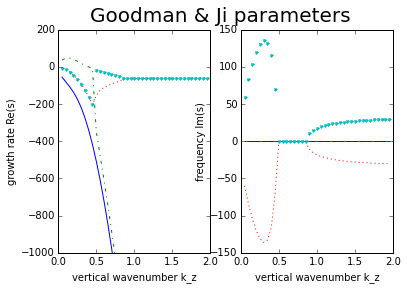

In [159]:
plt.figure()
ax = plt.subplot(121)
ax.plot(vertical_wavenumbers, out1[:, 0].real)
ax.plot(vertical_wavenumbers, out1[:, 1].real, '-.')
ax.plot(vertical_wavenumbers, out1[:, 2].real, ':')
ax.plot(vertical_wavenumbers, out1[:, 3].real, '.')
ax.set_ylim(-1000, 200)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(vertical_wavenumbers, out1[:, 0].imag)
ax.plot(vertical_wavenumbers, out1[:, 1].imag, '-.')
ax.plot(vertical_wavenumbers, out1[:, 2].imag, ':')
ax.plot(vertical_wavenumbers, out1[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')

plt.suptitle("Goodman & Ji parameters", size = 20)

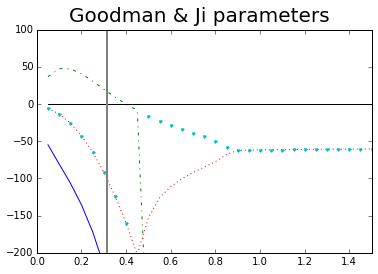

In [158]:
plt.figure()
plt.plot(vertical_wavenumbers, out1[:, 0].real)
plt.plot(vertical_wavenumbers, out1[:, 1].real, '-.')
plt.plot(vertical_wavenumbers, out1[:, 2].real, ':')
plt.plot(vertical_wavenumbers, out1[:, 3].real, '.')
plt.ylim(-200, 100)
plt.xlim(0.0, 1.5)
plt.plot(vertical_wavenumbers, np.zeros(len(vertical_wavenumbers)), color = "black")
plt.plot(np.ones(len(vertical_wavenumbers))*np.pi/10, np.linspace(-500, 200, len(vertical_wavenumbers)), color = "gray", lw = 2)
plt.suptitle("Goodman & Ji parameters", size = 20)

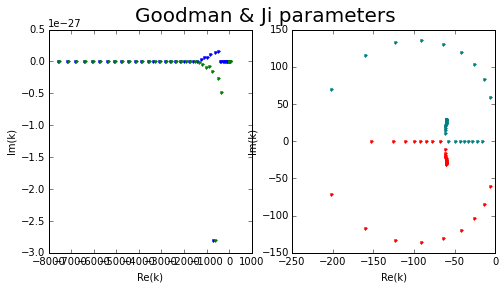

In [157]:
fig = plt.figure(figsize = (8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(out1[:, 0].real, out1[:, 0].imag, '.')
ax1.plot(out1[:, 1].real, out1[:, 1].imag, '.')
ax1.set_ylabel("Im(k)")
ax1.set_xlabel("Re(k)")

ax2.plot(out1[:, 2].real, out1[:, 2].imag, '.', color = "red")
ax2.plot(out1[:, 3].real, out1[:, 3].imag, '.', color = "teal")
ax2.set_ylabel("Im(k)")
ax2.set_xlabel("Re(k)")

plt.suptitle("Goodman & Ji parameters", size = 20)

What does this look like in the ideal MHD approximation?

In [133]:
goodmanjiparams_ideal = func(0, 0, 0, 10.0, 6, np.pi, 3000, c1gj, c2gj)
goodmanjibykz_ideal = lambdify(kz, goodmanjiparams_ideal)

vertical_wavenumbers = np.arange(0.05, 2, 0.05)
out_ideal = np.zeros((len(vertical_wavenumbers), 4), np.complex) # four roots
for i in range(len(vertical_wavenumbers)):
    hh1 = solve(goodmanjibykz_ideal(vertical_wavenumbers[i]))
    out_ideal[i, 0] = hh1[0]
    out_ideal[i, 1] = hh1[1]
    out_ideal[i, 2] = hh1[2]
    out_ideal[i, 3] = hh1[3]

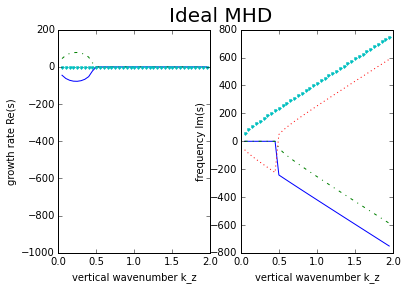

In [147]:
plt.figure()
ax = plt.subplot(121)
ax.plot(vertical_wavenumbers, out_ideal[:, 0].real)
ax.plot(vertical_wavenumbers, out_ideal[:, 1].real, '-.')
ax.plot(vertical_wavenumbers, out_ideal[:, 2].real, ':')
ax.plot(vertical_wavenumbers, out_ideal[:, 3].real, '.')
ax.set_ylim(-1000, 200)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(vertical_wavenumbers, out_ideal[:, 0].imag)
ax.plot(vertical_wavenumbers, out_ideal[:, 1].imag, '-.')
ax.plot(vertical_wavenumbers, out_ideal[:, 2].imag, ':')
ax.plot(vertical_wavenumbers, out_ideal[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')
plt.suptitle("Ideal MHD", size=20)

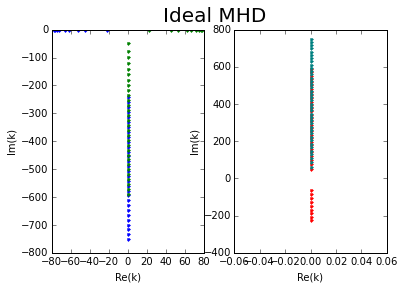

In [156]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(out_ideal[:, 0].real, out_ideal[:, 0].imag, '.')
ax1.plot(out_ideal[:, 1].real, out_ideal[:, 1].imag, '.')
ax1.set_ylabel("Im(k)")
ax1.set_xlabel("Re(k)")

ax2.plot(out_ideal[:, 2].real, out_ideal[:, 2].imag, '.', color = "red")
ax2.plot(out_ideal[:, 3].real, out_ideal[:, 3].imag, '.', color = "teal")
ax2.set_ylabel("Im(k)")
ax2.set_xlabel("Re(k)")

plt.suptitle("Ideal MHD", size = 20)

In [152]:
# eta for Rm = 1
eta_Pm1 = np.sqrt(Omega_in*Omega_out)/K**2
nu_Pm1 = eta_Pm1
print(eta)

goodmanjiparams_Pm1 = func(0, nu_Pm1, eta_Pm1, 10.0, 6, np.pi, 3000, c1gj, c2gj)
goodmanjibykz_Pm1 = lambdify(kz, goodmanjiparams_Pm1)

vertical_wavenumbers = np.arange(0.05, 2, 0.05)
out_Pm1 = np.zeros((len(vertical_wavenumbers), 2), np.complex) # two roots
for i in range(len(vertical_wavenumbers)):
    hh1 = solve(goodmanjibykz_Pm1(vertical_wavenumbers[i]))
    out_Pm1[i, 0] = hh1[0]
    out_Pm1[i, 1] = hh1[1]
    #out_Pm1[i, 2] = hh1[2]
    #out_Pm1[i, 3] = hh1[3]

552.655743705


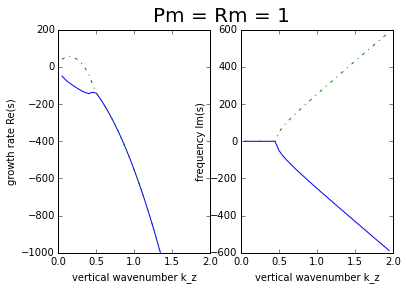

In [155]:
plt.figure()
ax = plt.subplot(121)
ax.plot(vertical_wavenumbers, out_Pm1[:, 0].real)
ax.plot(vertical_wavenumbers, out_Pm1[:, 1].real, '-.')
#ax.plot(vertical_wavenumbers, out_Pm1[:, 2].real, ':')
#ax.plot(vertical_wavenumbers, out_Pm1[:, 3].real, '.')
ax.set_ylim(-1000, 200)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(vertical_wavenumbers, out_Pm1[:, 0].imag)
ax.plot(vertical_wavenumbers, out_Pm1[:, 1].imag, '-.')
#ax.plot(vertical_wavenumbers, out_Pm1[:, 2].imag, ':')
#ax.plot(vertical_wavenumbers, out_Pm1[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')

plt.suptitle("Pm = Rm = 1", size = 20)

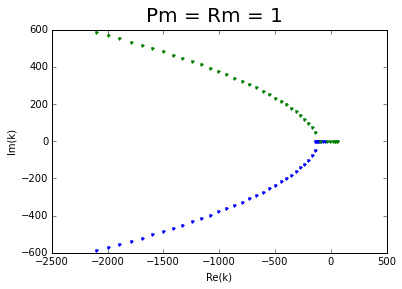

In [163]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)
ax1.plot(out_Pm1[:, 0].real, out_Pm1[:, 0].imag, '.')
ax1.plot(out_Pm1[:, 1].real, out_Pm1[:, 1].imag, '.')
ax1.set_ylabel("Im(k)")
ax1.set_xlabel("Re(k)")

plt.suptitle("Pm = Rm = 1", size = 20)

In [65]:
func_nu_eta = lambdify((kr, sigma, r, rho, pi, B0, c1, c2), disp)

In [67]:
goodmanjiparams_criticalkz = func_nu_eta(0, 0, 10.0, 6, np.pi, 3000, c1gj, c2gj)

In [103]:
%%time
#nu = 3.26e-3  cm2/scm2/s 
#eta = 2000  cm2/scm2/s
nu_sweep = np.arange(3.0E-3, 3.5E-3, 0.05E-3)
eta_sweep = np.arange(1500, 2500, 100)
print(len(nu_sweep), len(eta_sweep))

goodmanjibykz = lambdify((nu, eta), goodmanjiparams_criticalkz)
print solve(goodmanjibykz(3.26e-3, 2000))

(10, 10)


KeyboardInterrupt: 

In [92]:
%%time

nu_eta_space = np.zeros((len(nu_sweep), len(eta_sweep), 7), np.complex)
for i in range(len(nu_sweep)):
    for j in range(len(eta_sweep)):
        hh1 = solve(goodmanjibykz(nu_sweep[i], eta_sweep[j]))
        nu_eta_space[i, j, 0] = hh1[0]
        nu_eta_space[i, j, 1] = hh1[1]
        nu_eta_space[i, j, 2] = hh1[2]
        nu_eta_space[i, j, 3] = hh1[3]
        nu_eta_space[i, j, 4] = hh1[4]
        nu_eta_space[i, j, 5] = hh1[5]
        nu_eta_space[i, j, 6] = hh1[6]
        print("nu, eta", i, j)
        

('nu, eta', 0, 0)


KeyboardInterrupt: 